In [ ]:
# https://archive.ics.uci.edu/dataset/320/student+performance
# https://www.kaggle.com/datasets/larsen0966/student-performance-data-set

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [9]:
# Data load
df = pd.read_csv("student-mat.csv",sep=";")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


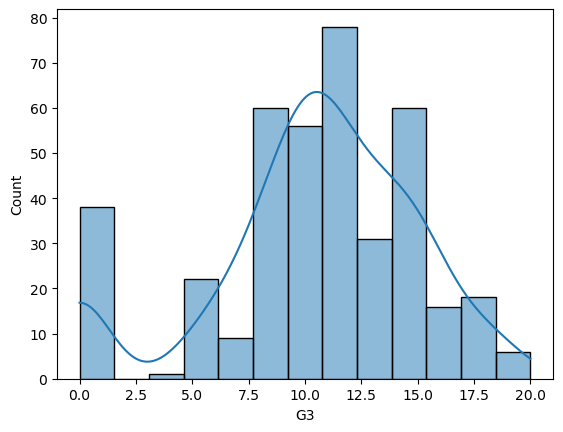

In [12]:
# EDA (Cleaning + Visualization)

sb.histplot(df['G3'], kde=True)
plt.show()

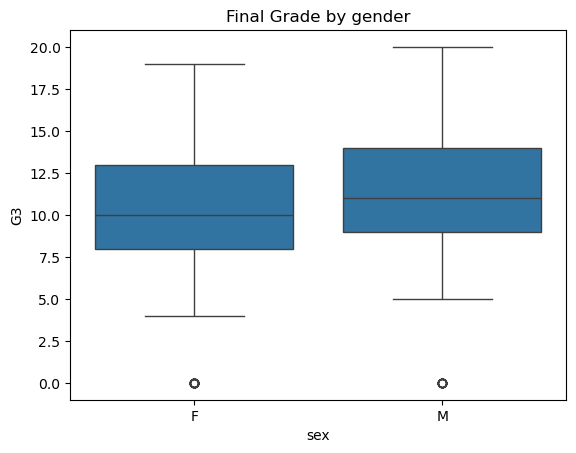

In [13]:
sb.boxplot(x='sex', y='G3', data=df)
plt.title('Final Grade by gender')
plt.show()

   age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  goout  \
0   18     4     4           2          2         0       4         3      4   
1   17     1     1           1          2         0       5         3      3   
2   15     1     1           1          2         3       4         3      2   
3   15     4     2           1          3         0       3         2      2   
4   16     3     3           1          2         0       4         3      2   

   Dalc  Walc  health  absences  G1  G2  G3  
0     1     1       3         6   5   6   6  
1     1     1       3         4   5   5   6  
2     2     3       3        10   7   8  10  
3     1     1       5         2  15  14  15  
4     1     2       5         4   6  10  10  


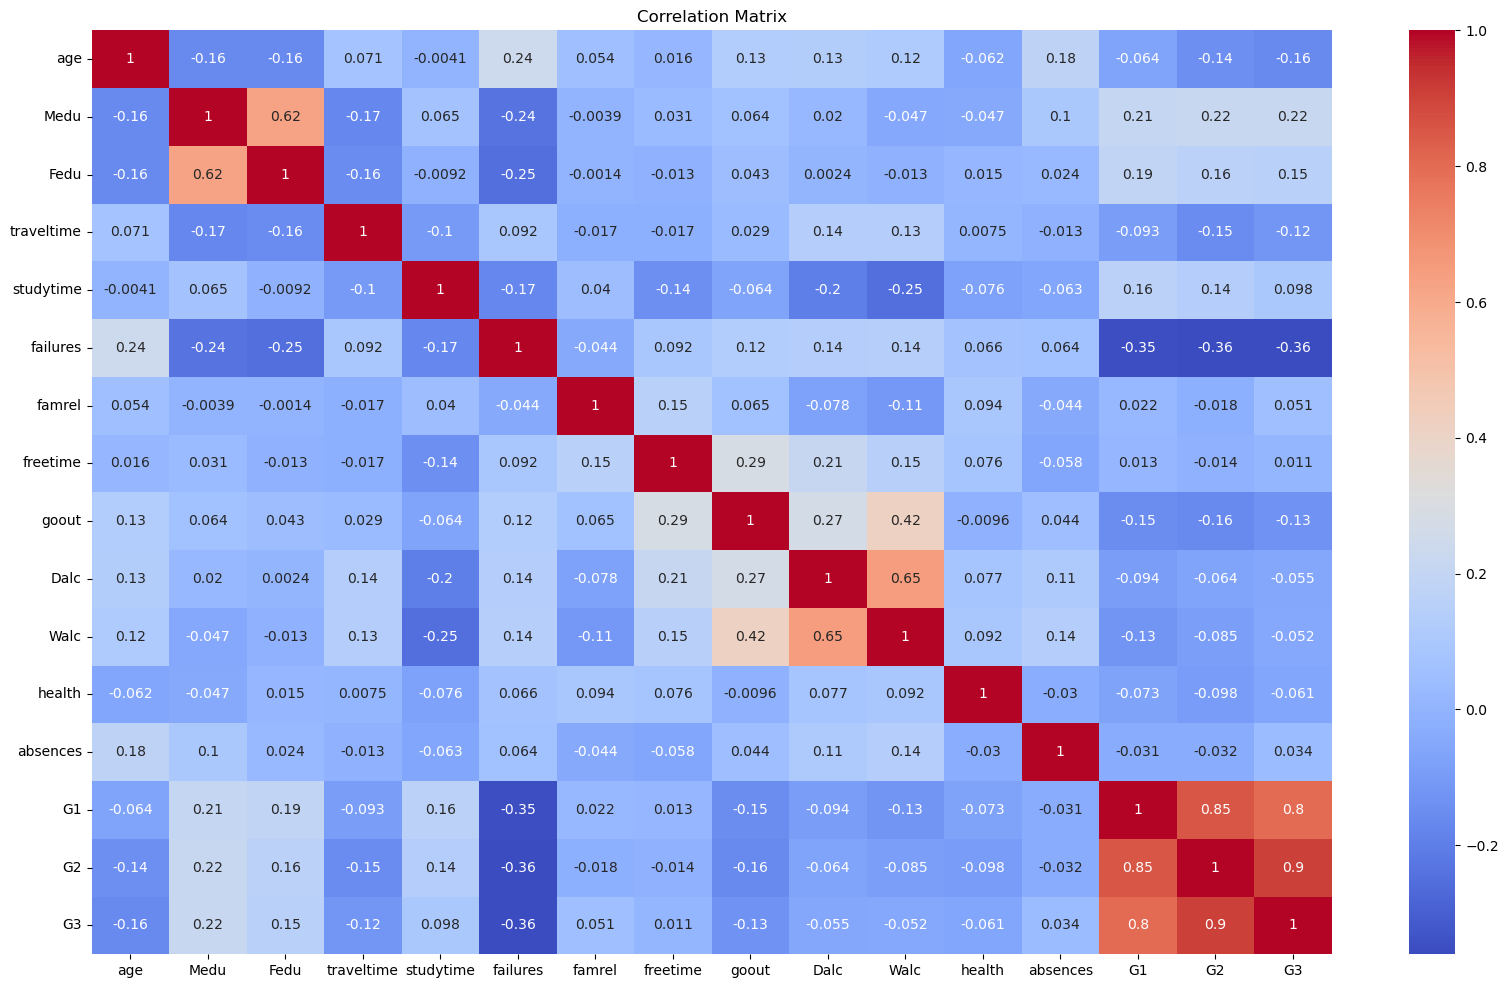

In [24]:
num_df = df.select_dtypes(include='number')
print(num_df.head())
#print(num_df.corr())
plt.figure(figsize=(20, 12))
sb.heatmap(num_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [29]:
# Encode the categorical columns 
# get_dummies uses one-hot encoding 

# n categories => n columns emitted => use n-1 columns to avoid dummy variable trap (multicollinearity)

df_enc = pd.get_dummies(df, drop_first=True)
pd.set_option('display.max_columns', None)
df_enc.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,True,True,False,False
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10,False,False,True,True,True,False,False,False,False,False,True,False,False,False,True,False,True,False,True,False,True,False,True,True,True,False
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15,False,False,True,False,True,True,False,False,False,False,False,True,False,True,False,False,True,False,False,True,True,True,True,True,True,True
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10,False,False,True,False,True,False,True,False,False,False,True,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False
